# Battery Savings Comparison

This notebook compares daily and total savings, as well as feed-in earnings, for different battery sizes using simulation results.

In [10]:
%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

battery_sizes = [6.0, 10.0, 15.0]
dfs = {}
for size in battery_sizes:
    file = f"output/battery_simulation_result_{size}kwh.csv"
    dfs[size] = pd.read_csv(file)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


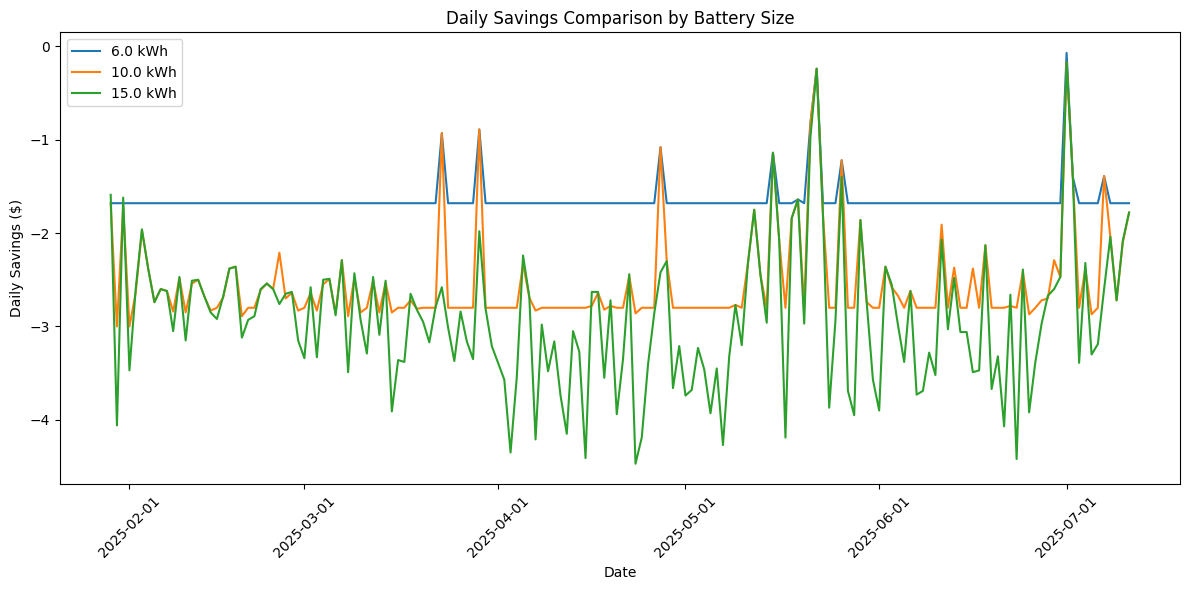

In [11]:
# Plot daily savings for each battery size
plt.figure(figsize=(12,6))
for size, df in dfs.items():
    df['date'] = pd.to_datetime(df['date'])
    plt.plot(df['date'], df['battery_daily_savings'], label=f'{size} kWh')
plt.xlabel('Date')
plt.ylabel('Daily Savings ($)')
plt.title('Daily Savings Comparison by Battery Size')
plt.legend()
plt.xticks(rotation=45)
import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

In [14]:
# Calculate and display total savings and feed-in earnings
summary = []
for size, df in dfs.items():
    total_savings = df['battery_daily_savings'].sum()
    total_feed_in_without = df['feed_in_earnings_without_battery'].sum()
    total_feed_in_with = df['battery_solar_export_kwh'].sum() * 0.03  # Assuming feed-in tariff is 0.03
    total_saving_with_solar_only = df['self_consumption_kwh'].sum()*0.344 + df['feed_in_to_grid_without_battery_kwh'].sum() * 0.05  # Assuming feed-in tariff is 0.03
    summary.append({
        'Battery Size (kWh)': size,
        'Total Savings ($)': round(total_savings, 2),
        'Total Feed-in Earnings Without Battery ($)': round(total_feed_in_without, 2),
        'Total Feed-in Earnings With Battery Export ($)': round(total_feed_in_with, 2),
        'Total Saving With Solar Only ($)': round(total_saving_with_solar_only, 2)
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

   Battery Size (kWh)  Total Savings ($)  \
0                 6.0            -267.86   
1                10.0            -415.86   
2                15.0            -477.77   

   Total Feed-in Earnings Without Battery ($)  \
0                                       91.07   
1                                       91.07   
2                                       91.07   

   Total Feed-in Earnings With Battery Export ($)  \
0                                           62.33   
1                                           46.37   
2                                           39.68   

   Total Saving With Solar Only ($)  
0                            545.17  
1                            545.17  
2                            545.17  


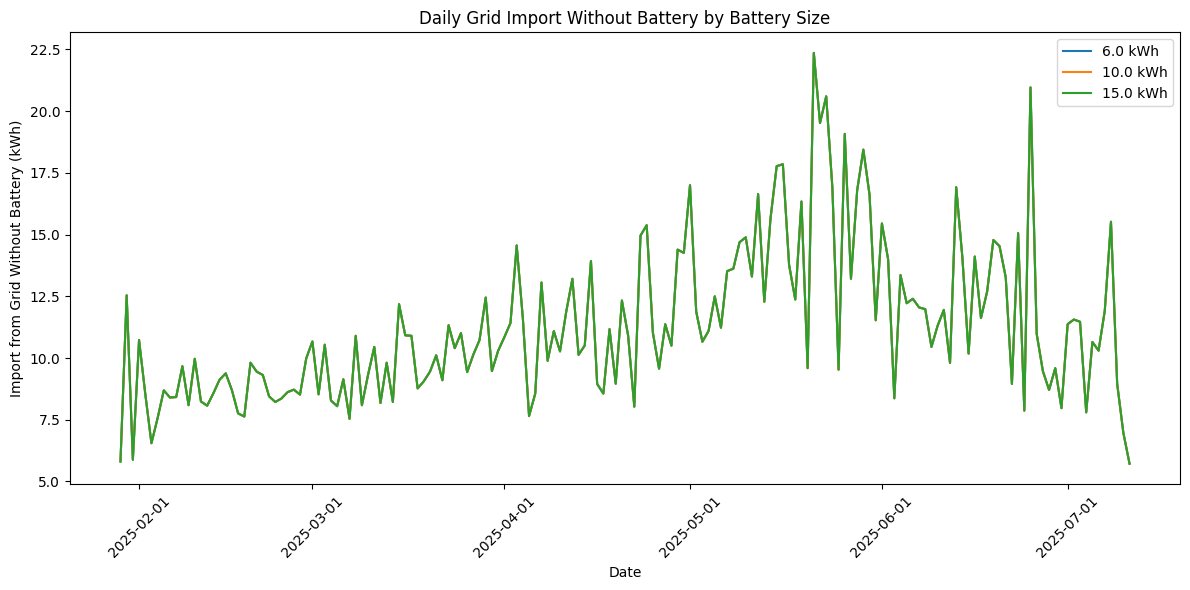

In [15]:
# Plot daily import from grid without battery for each battery size
plt.figure(figsize=(12,6))
for size, df in dfs.items():
    plt.plot(df['date'], df['import_from_grid_without_battery_kwh'], label=f'{size} kWh')
plt.xlabel('Date')
plt.ylabel('Import from Grid Without Battery (kWh)')
plt.title('Daily Grid Import Without Battery by Battery Size')
plt.legend()
plt.xticks(rotation=45)
import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

In [ ]:
# Count days with import_from_grid_without_battery_kwh > 10 for each battery size
for size, df in dfs.items():
    count_days_gt_10 = (df['import_from_grid_without_battery_kwh'] > 10).sum()
    count_days_le_10 = (df['import_from_grid_without_battery_kwh'] <= 10).sum()
    print(f"Battery Size {size} kWh: Days with import_from_grid_without_battery_kwh > 10 = {count_days_gt_10}")
    print(f"Battery Size {size} kWh: Days with import_from_grid_without_battery_kwh <= 10 = {count_days_le_10}")

Battery Size 6.0 kWh: Days with import_from_grid_without_battery_kwh > 10 = 97
Battery Size 6.0 kWh: Days with import_from_grid_without_battery_kwh <= 10 = 67
Battery Size 10.0 kWh: Days with import_from_grid_without_battery_kwh > 10 = 97
Battery Size 10.0 kWh: Days with import_from_grid_without_battery_kwh <= 10 = 67
Battery Size 15.0 kWh: Days with import_from_grid_without_battery_kwh > 10 = 97
Battery Size 15.0 kWh: Days with import_from_grid_without_battery_kwh <= 10 = 67
